In [1]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

<class 'numpy.ndarray'>


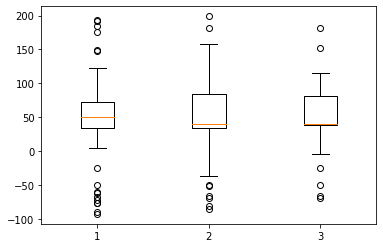

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
print(type(data))
# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

In [11]:
d2[::2, 0].size

48

Text(0.5, 1.0, 'y = x^2')

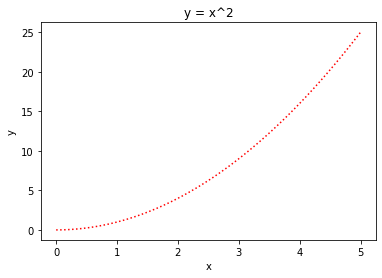

In [2]:
x=np.linspace(0,5,100)
y=x**2
plt.plot(x,y,'r:')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')

Text(0.5, 1.0, 'Small Plot')

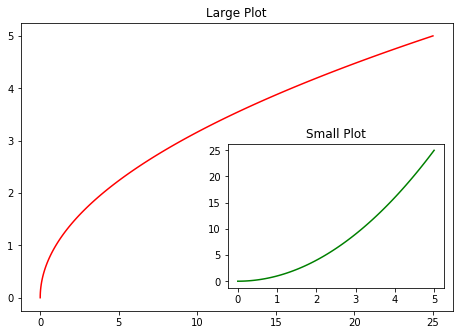

In [3]:
fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0.48,0.08,0.5,0.5])
axes1.plot(y,x,'r')
axes1.set_title('Large Plot')
axes2.plot(x,y,'g')
axes2.set_title('Small Plot')

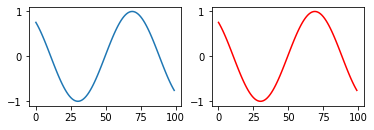

In [4]:
sin = np.sin(np.linspace(-4,4,100))
plt.subplot(2,2,1)
plt.plot(sin)
plt.subplot(2,2,2)
plt.plot(sin, c='r')

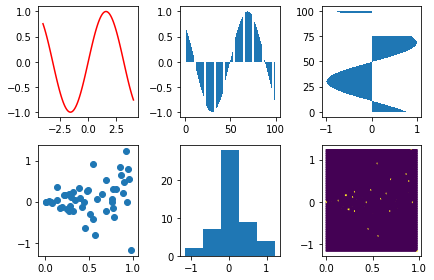

In [5]:
x=np.linspace(-4,4,100)
y= np.sin(x)
x1=np.random.uniform(size=50)
y1=x1*np.random.normal(0,1,size=50)
fig, ax = plt.subplots(2,3)
ax[0,0].plot(x,y, c='r')
ax[0,1].bar(range(len(y)),y)
ax[0,2].barh(range(len(y)),y)
ax[1,0].scatter(x1,y1)
ax[1,1].hist(y1,bins=5)#'auto')
ax[1,2].hexbin(x1,y1)
plt.tight_layout()

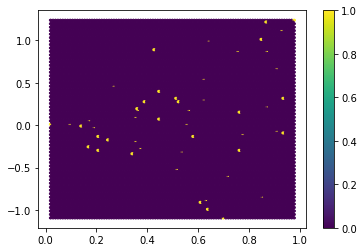

In [6]:
plt.figure()
plt.hexbin(x1,y1)
plt.colorbar()

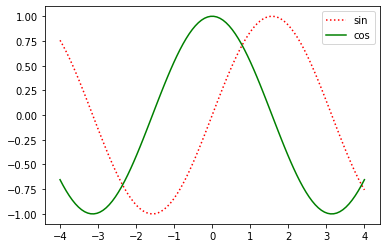

In [7]:
x=np.linspace(-4,4,100)
y1=np.sin(x)
y2=np.cos(x)
plt.plot(x,y1,':r')
plt.plot(x,y2,'-g')
plt.legend(('sin','cos'))

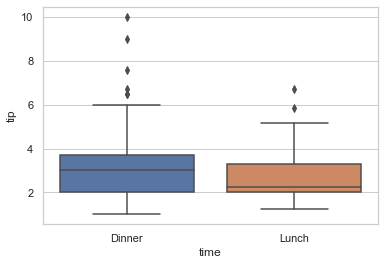

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
#ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.boxplot(x="time", y="tip", data=tips, order=['Dinner','Lunch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11c237850>,
 'caps': [<matplotlib.lines.Line2D at 0x11bb45350>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c228b90>,
 'medians': [<matplotlib.lines.Line2D at 0x11c23dd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c2378d0>,
 'means': []}

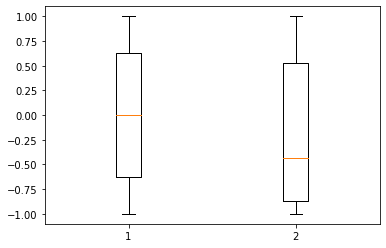

In [8]:
plt.boxplot([y1, y2])

Text(0, 0.5, 'cos')

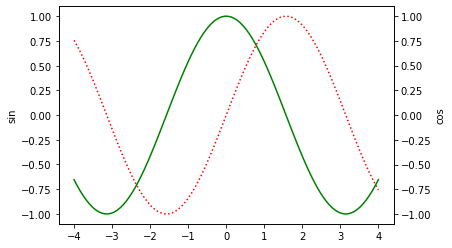

In [8]:
plt.figure()
ax1=plt.gca()
line1=ax1.plot(x,y1,':r')
ax2=ax1.twinx()
line2=ax2.plot(x,y2,'-g')
ax1.set_ylabel('sin')
ax2.set_ylabel('cos')

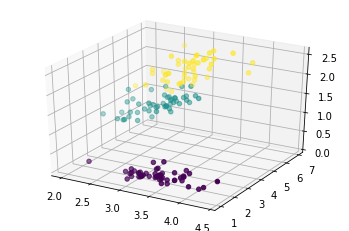

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()
x,y=iris.data, iris.target
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1],x[:,2],x[:,3],c=y)

In [10]:
import plotly
from plotly import __version__
print(__version__)

4.2.1


In [11]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special
py.offline.init_notebook_mode(connected=True)

In [12]:
x=np.linspace(0,np.pi, 1000)
layout = go.Layout(
    title='simple example',
    yaxis=dict(title='volts'),
    xaxis=dict(title='nanoseconds')
)

trace1 = go.Scatter(
    x=x,
    y=np.sin(x),
    mode='lines',
    name='sin(x)',
    line=dict(shape='spline')
)

fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

In [13]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special
py.offline.init_notebook_mode(connected=True)

In [14]:
x=np.linspace(0,np.pi, 1000)
layout = go.Layout(
    title='simple example',
    yaxis=dict(title='volts'),
    xaxis=dict(title='nanoseconds')
)

def update_plot(signals, freq):
    data=[]
    for s in signals:      
        trace1 = go.Scatter(
            x=x,
            y=special.jv(s, freq * x),
            mode='lines',
            name='bessel {}'.format(s),
            line=dict(shape='spline')
        )
        data.append(trace1)

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    
signals = widgets.SelectMultiple(options=list(range(6)), value=(0,), description='Blessel Order')
freq = widgets.FloatSlider(min=1, max=20, value=1, description='Freq')
widgets.interactive(update_plot, signals=signals, freq=freq)

interactive(children=(SelectMultiple(description='Blessel Order', index=(0,), options=(0, 1, 2, 3, 4, 5), valu…